# Uso de los números aleatorios

## 1. Introducción al Módulo random

El módulo random de la librería estándar de Python incluye un conjunto de funciones que permiten obtener de distintos modos 
números pseudoaleatorios a través del algoritmo [Mersenne Twister](https://es.wikipedia.org/wiki/Mersenne_twister).

In [1]:
#importamos el módulo que vamos a usar 

import random   

Las funciones de los módulos se invocan con el formato: módulo.función().

En el módulo random existe la función random, que devuelve un número aleatorio que sigue una distribución uniforme. 

Así, para obtener $x \sim U(0,1)$:

In [8]:
x = random.random()  #Cada ejecución dará un número distinto.
print(x)

0.19712893547060162


Se puede usar algún bucle si se desea generar una secuencia $x_i \sim U(0,1)$ con $i = 1, 2, 3,..., N$:

In [9]:
for i in range(10):
    print('%05.4f' % random.random(), end=' ')  #El código en rojo indica la cantidad de dígitos y de decimales a mostrar.
print()

0.0812 0.1055 0.4831 0.4532 0.8021 0.3159 0.9070 0.4103 0.6275 0.4342 


In [10]:
for i in range(10):
    print('%05.4f' % random.random(), sep="\t")
print()

0.2930
0.4907
0.1854
0.0158
0.9115
0.6639
0.2675
0.6343
0.5166
0.2901



La función seed() fija el valor de la semilla en la generación de la secuencia de números aleatorios. 
Esto es útil cuando se quieren utilizar los mismos datos de entrada en una simulación.

In [11]:
random.seed(1) #primero fijamos la semilla

for i in range(20):
    print('%05.4f' % random.random(), end=' ')
print()

0.1344 0.8474 0.7638 0.2551 0.4954 0.4495 0.6516 0.7887 0.0939 0.0283 0.8358 0.4328 0.7623 0.0021 0.4454 0.7215 0.2288 0.9453 0.9014 0.0306 


## Ejercicio 1: 
    a)Usar la función random() para simular 1 volado.
    b)Usar la función random() para simular 1000 volados.
    c)Determinar de b) la probabilidad de que ocurra "sol" en un volado. 

In [18]:
numero=random.randint(1,2)
if numero==1:
   lado='aguila'
if numero==2:
   lado='sol'
print(lado)

cara


In [44]:
aguila=0
sol=0
for i in range(10000):
  numero=random.randint(1,2)
  if numero==1:
    aguila+=1
  if numero==2:
    sol+=1
print("aguila:",aguila,"sol:",sol)


aguila: 5022 sol: 4978


In [52]:
aguila=0
sol=0
for i in range(1000):
  numero=random.randint(1,2)
  if numero==1:
    aguila+=1
  if numero==2:
    sol+=1
    solp=(sol/1000)*100
print("la probabilidad que salga sol es:",solp)

la probabilidad que salga sol es: 49.3


La función uniform() devuelve un número float incluido entre los valores indicados.

In [53]:
for i in range(10):
    print('%5.4f' %random.uniform(1, 50), end=' ')
print()

29.4973 43.5274 27.1319 4.8396 39.0248 48.4396 37.2828 13.0161 30.2685 26.3056 


La función randint() devuelve un número entero incluido entre los valores indicados. 
Los valores de los límites inferior y superior también pueden aparecer entre los valores devueltos.

In [54]:
for i in range(20):
    print(random.randint(-100, 100), end=' ')
print()

-99 -50 -18 -33 -94 30 -2 37 68 69 -60 98 -28 -19 -47 11 18 75 92 41 


## Ejercicio 2:
    a) Simular un sorteo de los colores blanco, negro, rojo, azul y verde.
    b) Simular 5 sorteos con sustitución.

In [77]:
lista = ["blanco", "negro", "rojo", "azul", "verde"]
print (random.choice(lista))

verde


In [91]:
lista = ["blanco", "negro", "rojo", "azul","verde"]
for color in lista:
      print(random.choice(lista))

negro
blanco
blanco
negro
verde


La función randrange() devuelve enteros que van desde un valor inicial a otro final 
separados entre sí un número de valores determinados.

In [92]:
for i in range(20):
    print(random.randrange(0, 20, 3), end=' ')
print()

6 15 3 15 0 12 12 3 0 6 18 0 6 15 18 15 6 0 15 18 


# 2. Estimación del número $\pi$

In [93]:
import matplotlib.pyplot as plt
import numpy as np

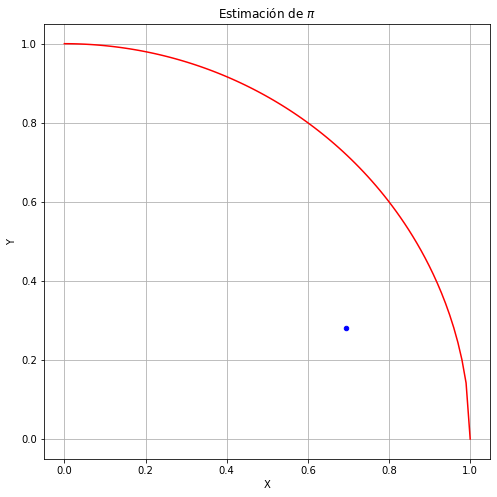

In [94]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante 


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1) 
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

# Tarea 1. 
    Estimar el valor de pi usando la función random

In [151]:
import numpy
N= 1000
x= numpy.random.uniform(low=-1, high=1, size=[N,1])
y= numpy.random.uniform(low=-1, high=1, size=[N,1])
adencirc= x**2+y**2<1
pi= 4*numpy.sum(adencirc)/N
print("pi:", pi)


pi: 3.056


## La aproximación analítica

Partamos de la ecuación:

##     $\pi = 4\arctan 1$

y usemos la aproximación de Taylor para expandir en una serie de potencias.

Recordar:

$f(x) = f(0) + f´(x)x + \frac{1}{2}f´´(0)x^2 + ...$

$Si f(x) = \arctan x$ entonces:

$f´(x) = \frac{d \arctan x}{dx} = \frac{1}{1 + x^2} \rightarrow f´(0) = 1$

$f´´(x) = \frac{d^2 \arctan x}{d^2x} = - \frac{2x}{(1 + x^2)^2} \rightarrow f´´(0) = 0$

...

$f^{2i + 1}(x) = (-1)^{i} \frac{(2i)!}{(1 + x^2)^{2i + 1}} \rightarrow f^{2i + 1}(0) = (-1)(2i)!$

$f^{2i}(x) = 0$

Entonces:

$\arctan x = \sum_{i = 0} (-1)^{i} \frac{x^{2i + 1}}{2i + 1}$

Por tanto:

## $\pi = \sum_{i = 0} (-1)^{i} \frac{4}{2i + 1}$

In [103]:
def pi_taylor(n):
    pi = 0
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
print(i, pi)

3999999 3.141652


In [104]:
pi_taylor(10)

In [109]:
def pi_Taylor(n):
    pi = 0
    L =[]
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        L.append(pi)
    fig = plt.figure(1, figsize=(8, 8))        
    plt.plot(L, color="red", markersize=1)
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación")
    plt.grid()
    plt.show()

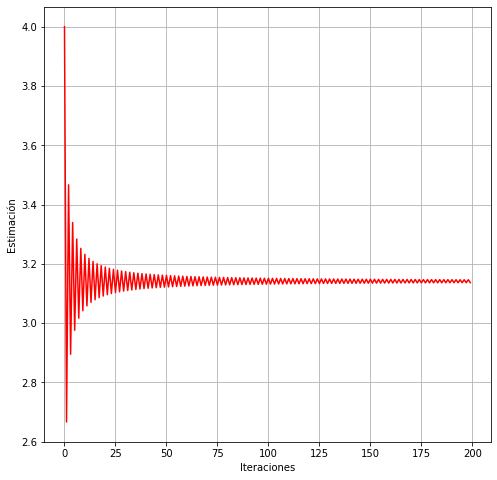

In [110]:
pi_Taylor(200)

## Ejercicio 3:

Graficar las salidas obtenidas en la Tarea 1

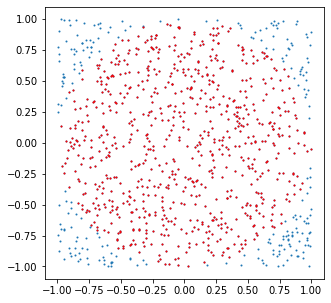

In [152]:
x_ad= x[adencirc]
y_ad= y[adencirc]
plt.figure(figsize=[5,5])
plt.scatter(x, y, s=1)
plt.scatter(x_ad, y_ad, color="r", s=1)
plt.show()

## Continuamos

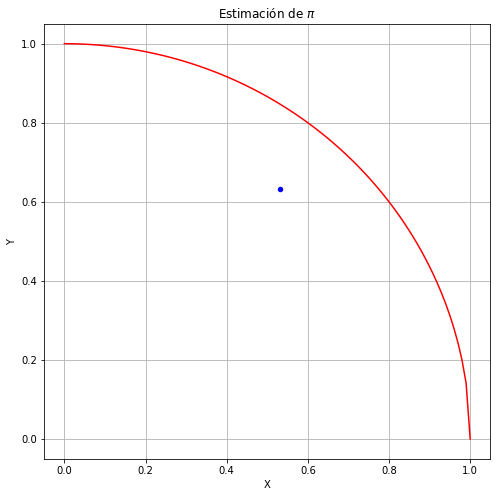

In [153]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante 


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1) 
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [154]:
def pi_mc(n):
    pi = 0
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
        pi = 4.0*float(counter)/(i + 1)
        print(i, pi)

In [155]:
pi_mc(10)

0 4.0
1 4.0
2 2.6666666666666665
3 3.0
4 3.2
5 3.3333333333333335
6 3.4285714285714284
7 3.0
8 3.111111111111111
9 3.2


In [157]:
def pi_mc(n):
    pi = 0
    lx = []
    ly = []
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
            lx.append(counter)
            ly.append(4.0*float(counter)/(i + 1))
        
        pi = 4.0*float(counter)/(i + 1)
        
        e = np.absolute((pi - np.pi)/np.pi)
    print("pi =", pi)
    print("error =", e)
    
    fig = plt.figure(1, figsize=(8, 8))        
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación de $\pi$")
    plt.grid()
    plt.plot(lx, ly, color="blue", markersize=1)
    plt.show()

pi = 3.132
error = 0.0030534364723675406


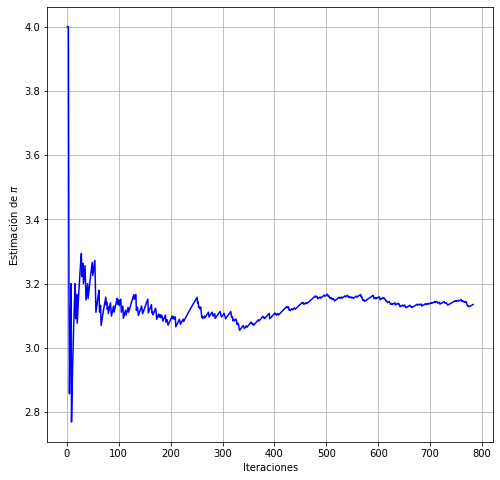

In [158]:
pi_mc(1000)

Si se tiene, para cada punto aleatorio:
    
$X_i = 1$ si cae dentro del circulo y

$X_i = 0$ si cae fuera

## Ejercicio 4:

a) Calcular $E[X_i]$ y $V[X_i]$




Para el experimento de simulación, definimos $Z_N = \frac{X_1 + X_2 + ... + X_N}{N}$

## Ejercicio 5:
a) Calcular  $E[Z_N]$ y $V[Z_N]$
b) ¿Cuál debe ser el valor de $N$ para que el error sea de 0.01?

# Integrales

In [ ]:
def riemannplot(f, a, b, ra, rb, n):
    # f es la función 
    # a y b son los limites del eje x para graficar la funcion f
    # ra y rb son los limites del intervalo en el eje x del que queremos calcular la suma
    # n es el numero de rectangulos que calcularemos

    atenuacion = (b-a)/100
    x = np.arange(a, b+atenuacion, atenuacion)
    
    plt.plot(x, f(x), color='red')

    delta_x = (rb-ra)/n
    riemannx = np.arange(ra, rb, delta_x)
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)

    plt.bar(riemannx,riemanny,width=delta_x,alpha=0.5,edgecolor = 'black',facecolor='green')
   
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    plt.title('Suma de Riemann por la izquierda de f(x)')
    plt.figtext(0.1,-0.05, "Suma de Riemann: %.5f " %(riemann_sum), color='b')
    plt.savefig('riemann.png')
    plt.show()

In [ ]:
def f(x):
    return np.sqrt(np.arctan(x))

In [ ]:
riemannplot(f, 0, 1.001, 0, 1.001, 20)